In [11]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci

In [12]:
#исходные данные задачи 
##### PART 1
n=80
mu, sigma = 1,4
# mean and standard deviation

In [19]:
s = np.random.normal(mu, sigma, n)
print(s)
a_estimate=np.mean(s) #среднее значение
sigma_estimate=np.std(s,ddof=1) #стандартное отклонение
(a_estimate,sigma_estimate)

[ -4.88229347   6.35232233   0.86609652 -11.43099006   1.88895355
   0.99852119   2.83114535  -3.82036963   2.91835784  -0.58353676
  -3.88434714  -3.38439666  -0.99261631  -1.72938039   0.37282588
  -1.0625502   -3.88696673  -3.70255095   2.34962976   0.9364745
  -1.64713661   1.690485    -0.32871153   5.3843536  -10.48341325
   9.3890052   -4.89682516   3.25439231   2.25977384   6.88276936
  -1.97217978  -6.82695666  -5.68910861   4.93493736   0.431509
   5.91770752   7.19707556   7.23613005   0.12818176   0.08903786
   6.53528971  -0.36489257  -5.06308231  -6.8494055   -2.9466027
  -1.45044951  -1.9862951   -2.52657764   7.60189224   3.59183282
  -0.51781877   5.43728454   1.93097926   4.59975637  -7.19329929
  -0.16441718   0.07560744   2.06400547   2.10718031   2.1721063
   7.09578808  -2.48701762   1.35670332  -5.96040939  -2.28965581
   0.76372727  -1.21969153   1.90102685   1.87812587   8.4942592
   3.84950095  -4.30272587   2.77116518   0.96868197   6.30767318
   2.25498031  -

(0.18201809924939122, 4.451791811663218)

In [20]:
k_bins = math.ceil(math.log2(n) + 1)

count, bin_edges = np.histogram(s,k_bins)
### count содержит абсолютные частоты для каждого интервала
print(count)
print(bin_edges)
print(sum(count))
sc=0
k=0
for i in count:
    sc+=i*(bin_edges[k+1]-bin_edges[k])
    k+=1
print(sc)

[ 2  4 11 13 18 17  8  7]
[-11.43099006  -8.82849065  -6.22599124  -3.62349184  -1.02099243
   1.58150698   4.18400638   6.78650579   9.3890052 ]
80
208.19995251950536


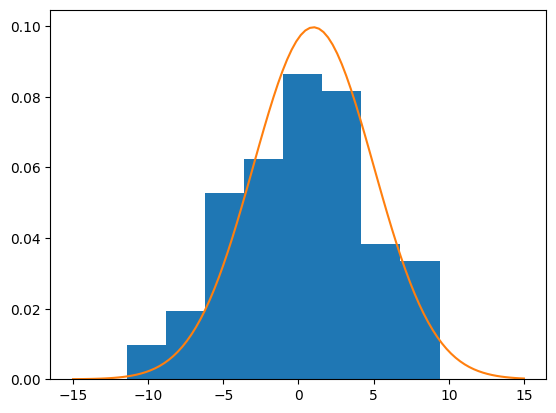

In [21]:
import scipy.stats as stats
x=np.linspace(-15,15, 100)
p=stats.norm.pdf(x, mu, sigma)
count, bins, ignored  = plt.hist(s, k_bins, density=True)
plt.plot(x,p)

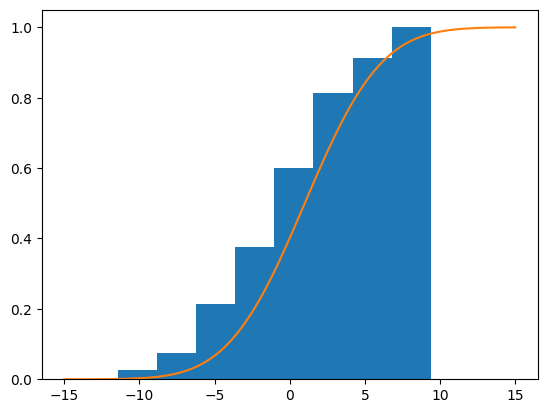

In [22]:
p=stats.norm.cdf(x, mu, sigma)
count, bins, ignored  = plt.hist(s, k_bins, density=True, cumulative=True)
plt.plot(x,p)

Axes(0.125,0.11;0.775x0.77)
[-11.43099006 -10.48341325]


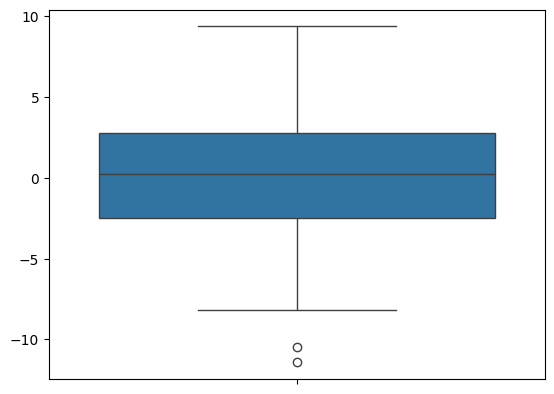

In [25]:
import seaborn as sb
W=sb.boxplot(s)
print(W)

qwart1=np.percentile(s,25)
qwart3=np.percentile(s,75)
I=qwart3-qwart1

l=qwart1-1.5*I
u=qwart3+1.5*I
out=s[(s<l)|(s>u)]
print(out)

In [26]:
import numpy as np
from scipy.stats import norm

mu = 1
sigma = 2
q = 2

## 3.1
lower_bound = mu - q * sigma
upper_bound = mu + q * sigma

probability = norm.cdf(upper_bound, mu, sigma) - norm.cdf(lower_bound, mu, sigma)
print(f'Теоретическая вероятность: {probability:.5f}')


Теоретическая вероятность: 0.95450


In [27]:
sample = np.random.normal(mu, sigma, n)

relative_frequency = np.mean(np.abs(sample - mu) < q * sigma)
print(f'Оцененная вероятность на выборке: {relative_frequency:.5f}')

Оцененная вероятность на выборке: 0.92500


In [28]:
n_large = n * 50
large_sample = np.random.normal(mu, sigma, n_large)

relative_frequency_large = np.mean(np.abs(large_sample - mu) < q * sigma)
print(f'Оцененная вероятность на большой выборке: {relative_frequency_large:.5f}')

Оцененная вероятность на большой выборке: 0.95375


In [29]:
import numpy as np
from scipy.stats import describe

n = 80
mu = 1
sigma = 2

sample = np.random.normal(mu, sigma, n)

# 4.1 
mean_sample = np.mean(sample)
median_sample = np.median(sample)
var_sample = np.var(sample, ddof=1)
std_sample = np.std(sample, ddof=1)

# Вычисление асимметрии и эксцесса
skewness_sample = (n / ((n - 1) * (n - 2))) * np.sum(((sample - mean_sample) / std_sample) ** 3)
kurtosis_sample = (n * (n + 1) / ((n - 1) * (n - 2) * (n - 3))) * np.sum(((sample - mean_sample) / std_sample) ** 4) - (3 * (n - 1) ** 2 / ((n - 2) * (n - 3)))

print(f"Оценки по формулам:\nМатематическое ожидание: {mean_sample:.5f}\n"
      f"Дисперсия: {var_sample:.5f}\nСтандартное отклонение: {std_sample:.5f}\n"
      f"Медиана: {median_sample:.5f}\nАсимметрия: {skewness_sample:.5f}\nЭксцесс: {kurtosis_sample:.5f}")

Оценки по формулам:
Математическое ожидание: 1.06213
Дисперсия: 5.27233
Стандартное отклонение: 2.29616
Медиана: 1.39639
Асимметрия: -0.18254
Эксцесс: -0.24786


In [30]:
descr = describe(sample)
mean_func = descr.mean
var_func = descr.variance
std_func = np.sqrt(var_func)
skewness_func = descr.skewness
kurtosis_func = descr.kurtosis

print(f"Оценки по формулам:\nМатематическое ожидание: {mean_func:.5f}\n"
      f"Дисперсия: {var_func:.5f}\nСтандартное отклонение: {std_func:.5f}\n"
      f"Медиана: {median_sample:.5f}\nАсимметрия: {skewness_func:.5f}\nЭксцесс: {kurtosis_func:.5f}")

Оценки по формулам:
Математическое ожидание: 1.06213
Дисперсия: 5.27233
Стандартное отклонение: 2.29616
Медиана: 1.39639
Асимметрия: -0.17910
Эксцесс: -0.30671


In [31]:
large_sample = np.random.normal(mu, sigma, n * 50)
descr_large = describe(large_sample)
median_large = np.median(sample)

mean_large = descr_large.mean
var_large = descr_large.variance
std_large = np.sqrt(var_large)
skewness_large = descr_large.skewness
kurtosis_large = descr_large.kurtosis

print(f"Оценки по формулам:\nМатематическое ожидание: {mean_large:.5f}\n"
      f"Дисперсия: {var_large:.5f}\nСтандартное отклонение: {std_large:.5f}\n"
      f"Медиана: {median_large:.5f}\nАсимметрия: {skewness_large:.5f}\nЭксцесс: {kurtosis_large:.5f}")

Оценки по формулам:
Математическое ожидание: 0.96103
Дисперсия: 3.96197
Стандартное отклонение: 1.99047
Медиана: 1.39639
Асимметрия: -0.04061
Эксцесс: 0.01969
